# Cardiovascular Disease Classification Analysis

### 1. Library Imports

In [1012]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%matplotlib inline

### 2. Load the CSV Data

In [1013]:
df = pd.read_csv('../data/cardio_train.csv', delimiter=';')


# I. Business Understanding (10 points) | David

_Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific._



# II.  Data Meaning Type (10 points) | Daniel

_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file._

From the data description of the Kaggle competition.  

* https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

There are 3 types of input features in the data set.
- Objective: factual information
- Examination:  results from a medical examination
- Subjective:  response provided by patient


| Column Description | Feature Type | Column Name | Data Type |
|-------------|--------------|-------------|-----------|
| Age                        | Objective | age | int (days) |
| Height                     | Objective | height | int (cm) |
| Weight                     | Objective | weight | float (kg) |
| Gender                     | Objective | gender | categorical code |
| Systolic blood pressure    | Examination | ap_hi | int |
| Diastolic blood pressure   | Examination | ap_lo | int |
| Cholesterol                | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                    | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking                    | Subjective | smoke | binary |
| Alcohol intake             | Subjective | alco | binary |
| Physical activity          | Subjective | active | binary |
| Has CVD?                   | Target | cardio | binary |

In [1014]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We decided to use the `id` column as the index as it appears to be a unique identifier for the subject.

In [1015]:
df.set_index("id", inplace=True)

In [1016]:
df.index.is_unique

True

# III. Data Quality (15 points) | Chance

_Explain any missing values, duplicate data, and outliers.  Are those mistakes? How do you deal with these problems? Give justifications for your methods._

## Identify Dimensions

In [1017]:
df.shape

(70000, 12)

Our data set has `70 thousand` rows and `12` columns, which should work nicely for many of the machine learning classifiers we may attempt to utilize.

In [1018]:
cols = df.columns

Store columns for later use.

In [1019]:
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## Missing Values

There are no missing values in any of the columns of the default data.  But upon furhter inspection we found that zeros or other values may have been used in place of missing entries which should also be addressed.

In [1020]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

## Duplicates


In [1021]:
df.duplicated().any() 


True

There do appear to be missing values.

In [1022]:
df.duplicated().sum()

24

There were a total of 24 sets where all columns of an observation equal at least one other record in the set. It was important to remove id as part of the data frame otherwise these duplicated entries would have been more difficult to detect.

In [1023]:
duplicated = df[df.duplicated(keep=False)].sort_values(by=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [1024]:
duplicated.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9004,14552,1,158,64.0,120,80,1,1,0,0,1,0
57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
24435,16160,1,168,65.0,120,80,1,1,0,0,1,1
91592,16160,1,168,65.0,120,80,1,1,0,0,1,1
1685,16793,1,165,68.0,120,80,1,1,0,0,1,0
31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
40450,16805,1,157,67.0,120,80,1,1,0,0,1,0
86345,16805,1,157,67.0,120,80,1,1,0,0,1,0
14974,16937,2,170,70.0,120,80,1,1,0,0,0,0


In [1025]:
df_clean = df.copy(deep=True)

In [1026]:
df_clean.drop_duplicates(inplace=True)

We'll remove the duplicates entirely, as this should not affect the ability of our models to make predictions with the amount of observations at our disposal.


## Transformations

In [1027]:
# %%time
# df_clean['age'] = df_clean['age'].apply(lambda x: round(x / 365))
df_clean['age'] = (df_clean['age'] / 365).round().astype('int')

Age was provided in days, and for the sake of interoperability we'll be converting this to years for all observations.

## Outliers

In [1028]:
plt.style.use('ggplot')

### Continuous Variables

#### Age

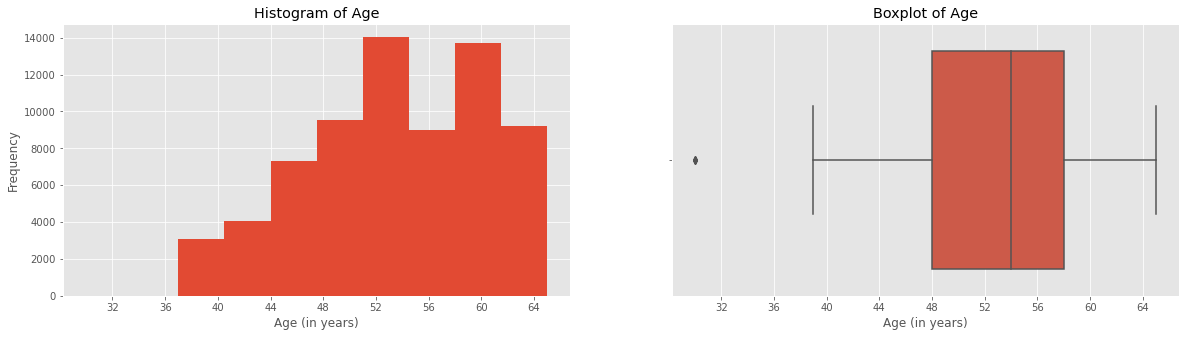

In [1029]:

fig_1 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.hist(df_clean["age"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Age')
chart_1.set_xlabel('Age (in years)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="age", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Age')
chart_2.set_xlabel('Age (in years)')


plt.show()

Height

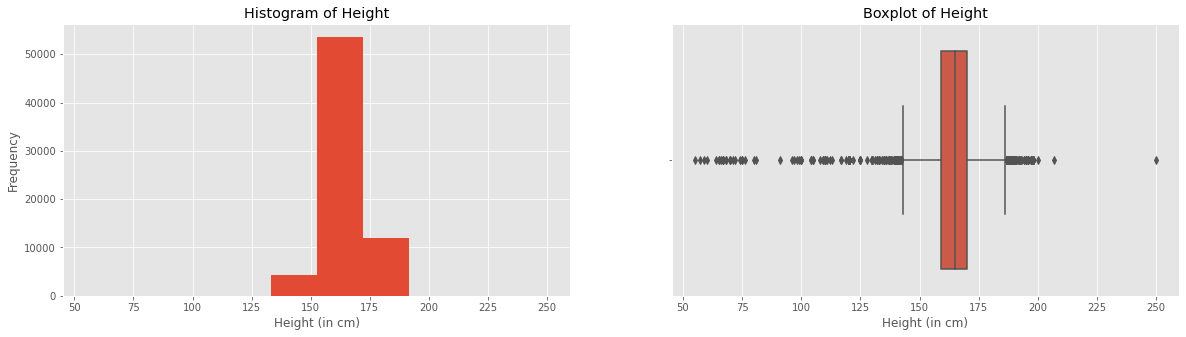

In [1030]:

fig_2 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_2.add_subplot(121)
chart_2 = fig_2.add_subplot(122)

chart_1.hist(df_clean["height"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Height')
chart_1.set_xlabel('Height (in cm)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="height", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Height')
chart_2.set_xlabel('Height (in cm)')


plt.show()

There are quite a few outliers in the height column that should be addressed.

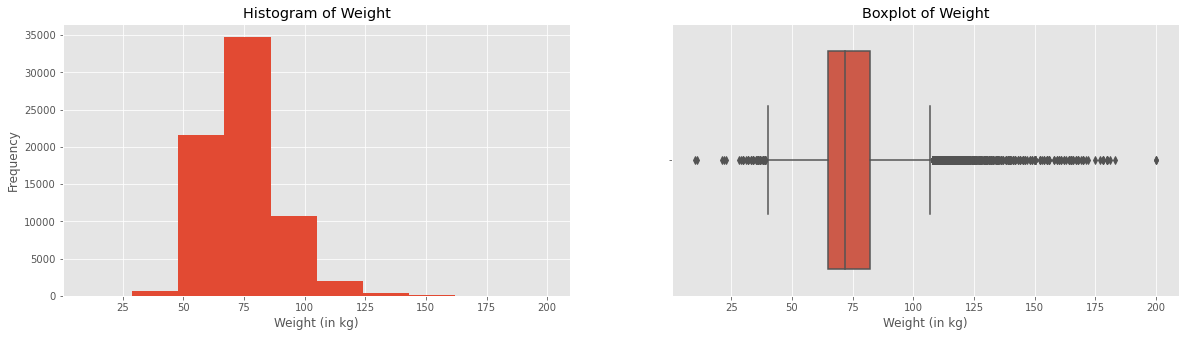

In [1031]:

fig_3 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_3.add_subplot(121)
chart_2 = fig_3.add_subplot(122)

chart_1.hist(df_clean["weight"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Weight')
chart_1.set_xlabel('Weight (in kg)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="weight", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Weight')
chart_2.set_xlabel('Weight (in kg)')


plt.show()

Similarly, there are a lot of outliers in the weight column as well.

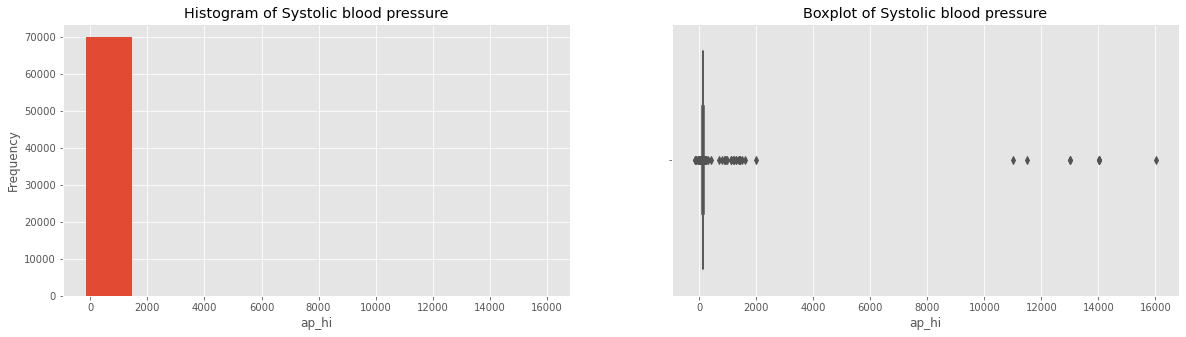

In [1032]:

fig_4 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_4.add_subplot(121)
chart_2 = fig_4.add_subplot(122)

chart_1.hist(df_clean["ap_hi"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Systolic blood pressure')
chart_1.set_xlabel('ap_hi')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="ap_hi", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Systolic blood pressure')
chart_2.set_xlabel('ap_hi')


plt.show()

The distribution of the Systolic blood pressure was quite unusual.

In [1033]:
df_clean["ap_hi"].sample(10)

id
36943    120
72441    130
26767    130
44429    140
34958    160
78253    130
59312    140
12291    120
6219     120
16400    110
Name: ap_hi, dtype: int64

A random sample show values within the expected range.

In [1034]:
df_clean["ap_hi"].sort_values()

id
50055     -150
34295     -140
66571     -120
36025     -120
22881     -115
         ...  
36339    14020
66998    14020
67502    14020
36414    14020
58374    16020
Name: ap_hi, Length: 69976, dtype: int64

But there were negative values and extremely high ones that should be excluded.  We'll take care of the at or below zero entries now.

In [1035]:
df_clean = df_clean[~(df_clean['ap_hi'] <= 0) & (df_clean['ap_hi'] < 250)]
df_clean.shape[0]

69929

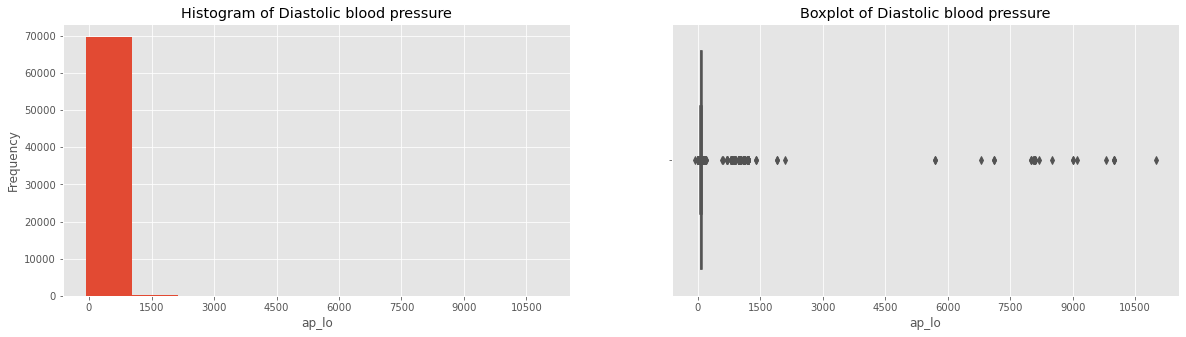

In [1036]:

fig_5 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_5.add_subplot(121)
chart_2 = fig_5.add_subplot(122)

chart_1.hist(df_clean["ap_lo"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Diastolic blood pressure')
chart_1.set_xlabel('ap_lo')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="ap_lo", data=df_clean, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Diastolic blood pressure')
chart_2.set_xlabel('ap_lo')


plt.show()

In [1037]:
df_clean["ap_lo"].sample(10)


id
76750     80
98033     90
73196     90
53336     70
36216    100
11821     80
42546     80
60685     70
95118     90
36484     80
Name: ap_lo, dtype: int64

In [1038]:
df_clean["ap_lo"].sort_values()

id
85816      -70
19258        0
91073        0
65470        0
24837        0
         ...  
62058     9800
97907    10000
34098    10000
3352     10000
61901    11000
Name: ap_lo, Length: 69929, dtype: int64

In [1039]:
df_clean = df_clean[~(df_clean['ap_lo'] <= 0) & (df_clean['ap_lo'] < 250)]
df_clean.shape[0]

68961

### Categorical Variables

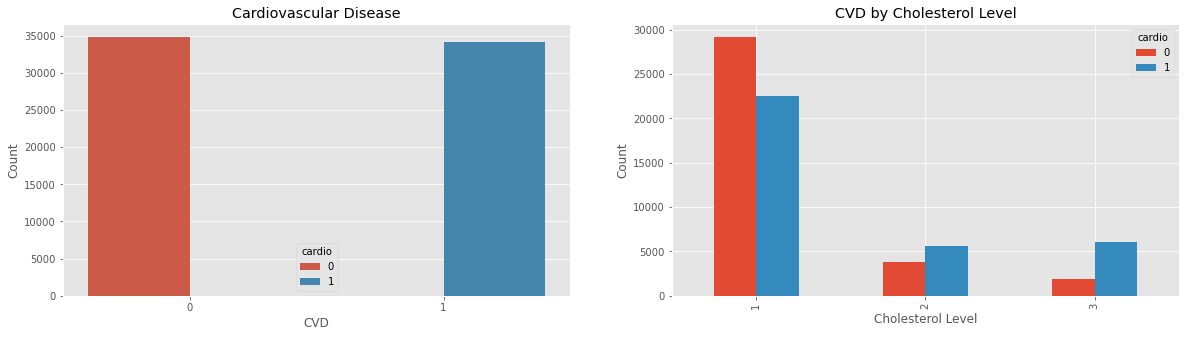

In [1040]:

fig_6 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_6.add_subplot(121)
chart_2 = fig_6.add_subplot(122)

sns.countplot(x="cardio", hue="cardio", data=df_clean, ax=chart_1)
# chart_1.legend(bbox_to_anchor=(1,1), title='CVD')
chart_1.set_title('Cardiovascular Disease')
chart_1.set_xlabel('CVD')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["cholesterol"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Cholesterol Level')
chart_2.set_xlabel('Cholesterol Level')
chart_2.set_ylabel('Count')


plt.show()

The Cardiovascular Disease (CVD) response variable is equally distributed and there are enough observations within each category of the cholesterol level to work for our modeling.  The presence  or absence of CVD does seem to change with the cholesterol levels. 

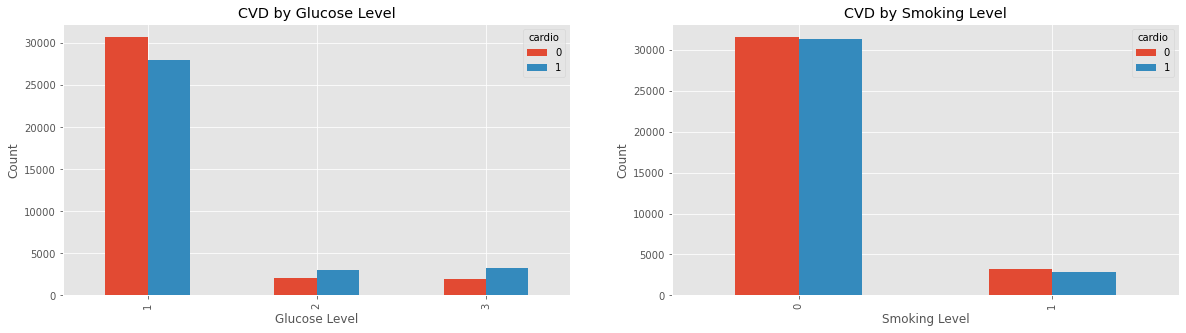

In [1041]:
fig_7 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_7.add_subplot(121)
chart_2 = fig_7.add_subplot(122)

pd.crosstab(df_clean["gluc"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Glucose Level')
chart_1.set_xlabel('Glucose Level')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["smoke"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Smoking Level')
chart_2.set_xlabel('Smoking Level')
chart_2.set_ylabel('Count')


plt.show()

The presence or absence of CVD also changes with the glucose levels but suprsingly not with smoking.

In [1042]:
df_clean.groupby(['gluc', 'cardio']).size().unstack(fill_value=0)

cardio,0,1
gluc,,
1,30730,27896
2,2093,2995
3,2004,3243


There are only a few thousand entries within levels 2 and 3 of the Choleserol column.

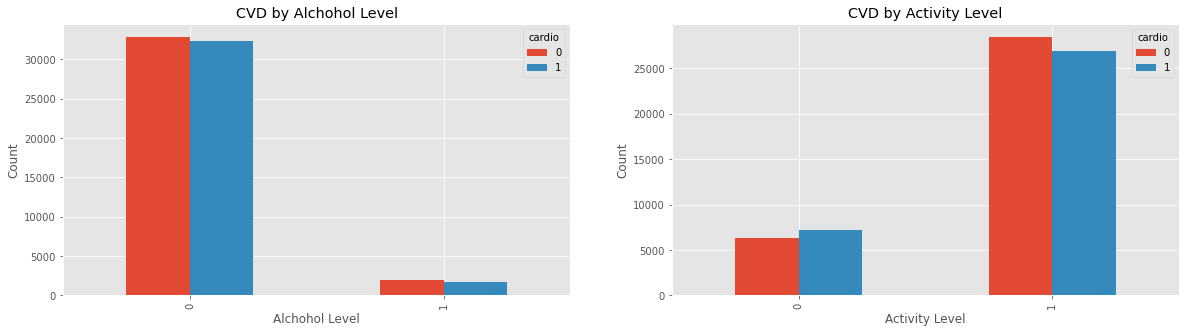

In [1043]:
fig_8 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_8.add_subplot(121)
chart_2 = fig_8.add_subplot(122)

pd.crosstab(df_clean["alco"], df_clean["cardio"]).plot(kind="bar", ax=chart_1)
chart_1.set_title('CVD by Alchohol Level')
chart_1.set_xlabel('Alchohol Level')
chart_1.set_ylabel('Count')


pd.crosstab(df_clean["active"], df_clean["cardio"]).plot(kind="bar", ax=chart_2)
chart_2.set_title('CVD by Activity Level')
chart_2.set_xlabel('Activity Level')
chart_2.set_ylabel('Count')


plt.show()

Also suprising is that the `Alcohol level` didn't seem to have an impact on the response variable.  The `Activity Level` did show good seperation.

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [1044]:
from scipy import stats
# df_clean = df_clean[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)]

_This approach seems easier_

https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame



In [1045]:
df_clean[(np.abs(df_clean['age'] - df_clean['age'].mean()) > (3 * df_clean['age'].std()))].head()
df_clean = df_clean[~(np.abs(df_clean['age'] - df_clean['age'].mean()) > (3 * df_clean['age'].std()))]

In [1046]:
df_clean[(np.abs(df_clean['height'] - df_clean['height'].mean()) > (3 * df_clean['height'].std()))].head()
df_clean = df_clean[~(np.abs(df_clean['height'] - df_clean['height'].mean()) > (3 * df_clean['height'].std()))]

In [1047]:
df_clean[(np.abs(df_clean['weight'] - df_clean['weight'].mean()) > (3 * df_clean['weight'].std()))].head()
df_clean = df_clean[~(np.abs(df_clean['weight'] - df_clean['weight'].mean()) > (3 * df_clean['weight'].std()))]

In [1048]:
df_clean[(np.abs(df_clean['ap_hi'] - df_clean['ap_hi'].mean()) > (3 * df_clean['ap_hi'].std()))].head()
df_clean = df_clean[~(np.abs(df_clean['ap_hi'] - df_clean['ap_hi'].mean()) > (3 * df_clean['ap_hi'].std()))]


In [1049]:
df_clean[(np.abs(df_clean['ap_lo'] - df_clean['ap_lo'].mean()) > (3 * df_clean['ap_lo'].std()))].head()
df_clean = df_clean[~(np.abs(df_clean['ap_lo'] - df_clean['ap_lo'].mean()) > (3 * df_clean['ap_lo'].std()))]

In [1050]:
df_clean.shape

(66396, 12)

# IV. Simple Statistics (10) | Shane 

_Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful._

In [1051]:
df_clean.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000,66396.000000
mean,53.307564,1.345970,164.377041,73.406261,125.636288,80.857808,1.356829,1.220902,0.086692,0.052443,0.803904,0.486023
std,6.769044,0.475687,7.670739,13.081824,15.059612,8.707137,0.673557,0.566997,0.281385,0.222920,0.397045,0.499808
min,39.000000,1.000000,140.000000,32.000000,80.000000,53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,188.000000,116.000000,179.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# V. Visualize Attributes (15) | TEAM (DECIDE ON 5)

_Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate._Visualize_

# VI. Explore Joint Attributes (15) | weight/ height - BMI | Daniel

_Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships._

In [1052]:
# %%time
# sns.pairplot(df.sample(5))
# sns.pairplot(df)
# plt.savefig('pair_plot.png')
# plt.show()

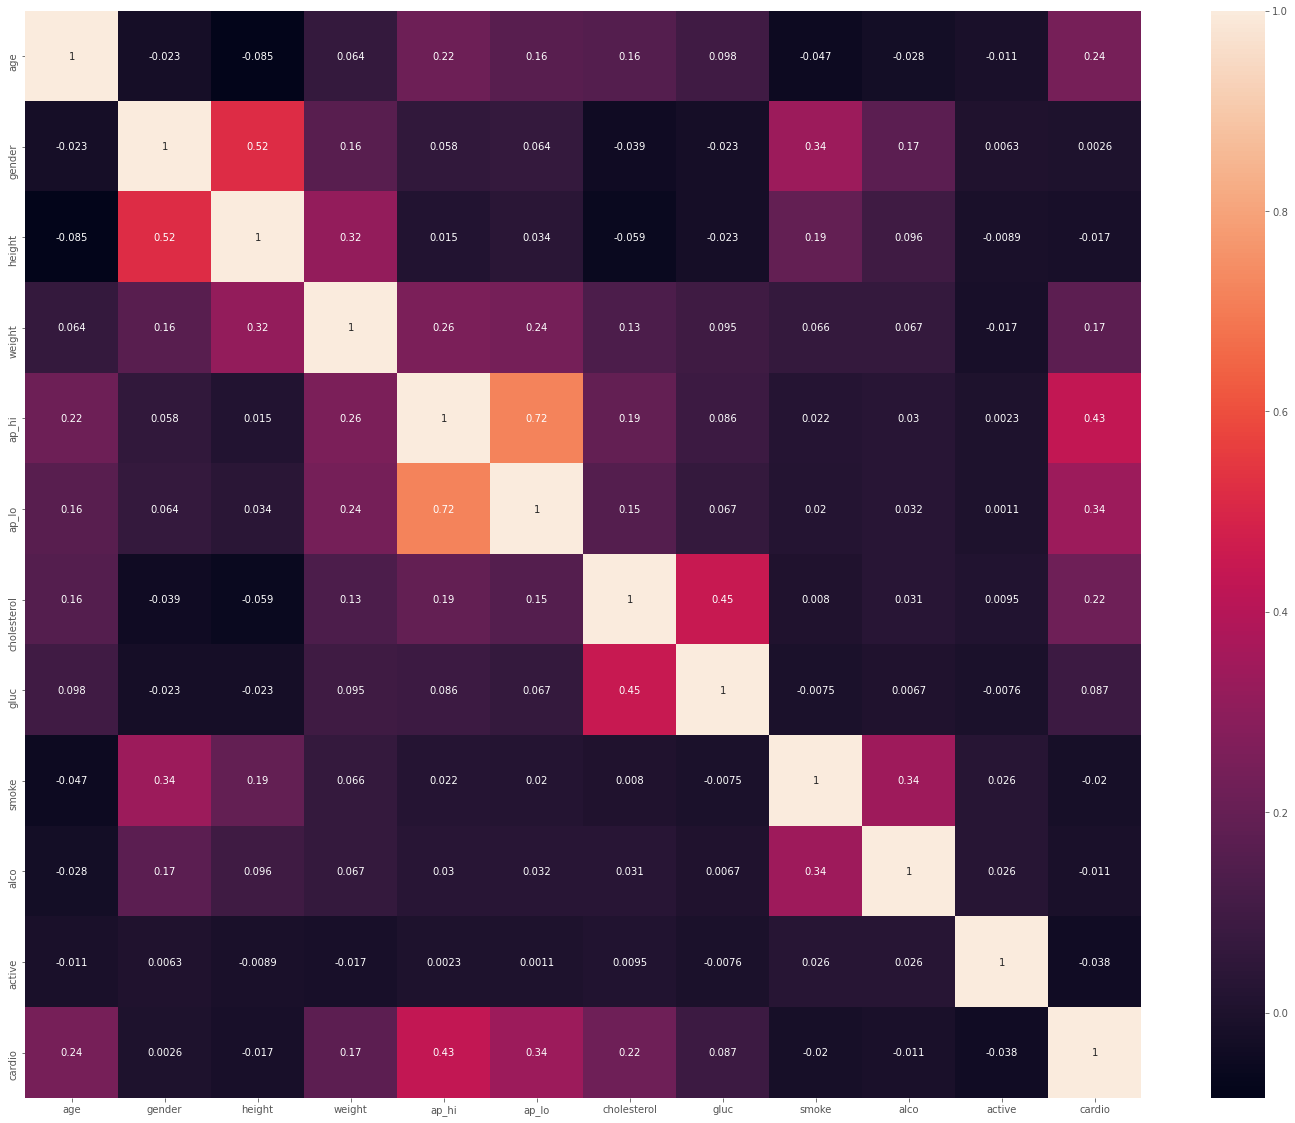

In [1053]:
plt.figure(figsize=(25,20))
sns.heatmap(df_clean.corr(), annot = True)

# VII. Explore Attributes and Class (10) | David

_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._

# VIII. New Features (5) - Daniel

_Are there other features that could be added to the data or created from existing features? Which ones?_

# IX. Exceptional Work (10) | (TEAM)

_You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results._

### Store feature matrix as an ndarray

In [1054]:
X_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df_clean[X_cols].to_numpy()

In [1055]:
type(X)

numpy.ndarray

### Store response vector

In [1056]:
y = df_clean['cardio'].to_numpy()

In [1057]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1058]:
y_pred = logreg.predict(X_test)
print('Accuracy of the log reg model on the test data: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of the log reg model on the test data: 0.71


In [1059]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7862 2431]
 [3366 6260]]


In [1060]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.70      0.76      0.73     10293
           1       0.72      0.65      0.68      9626

    accuracy                           0.71     19919
   macro avg       0.71      0.71      0.71     19919
weighted avg       0.71      0.71      0.71     19919

